In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def elu(x, mu=1.0):
    idx = np.where(x >= 0)[0]
    y = np.empty_like(x)
    y[idx] = x[idx]
    idx = np.where(x<0)[0]
    y[idx] = mu*(np.exp(x[idx])-1)
    return y

def gelu_approx(x):
    y = 0.5 * x * ( 1 + np.tanh( ((2 / np.pi)**0.5) * ( x + 0.044715 * x*x*x ) ) )
    return y

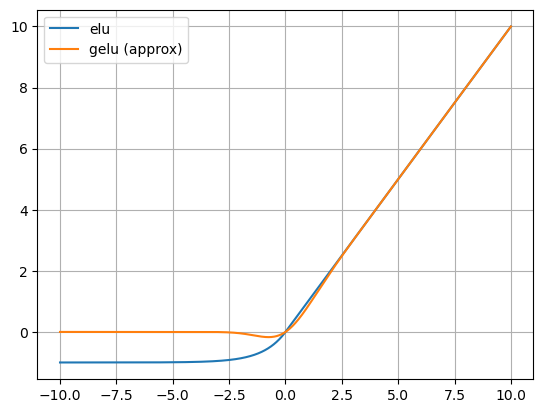

In [8]:
x = np.linspace(-10, 10, 1001)

y1 = np.tanh(x)
y2 =1/(1+np.exp(-x))
y3 = elu(x)
y4 = gelu_approx(x)

# plt.plot(x, y1, label='tanh')
# plt.plot(x, y2, label='sigmoid')
plt.plot(x, y3, label='elu')
plt.plot(x, y4, label='gelu (approx)')
plt.legend()
plt.grid(True)
plt.show()

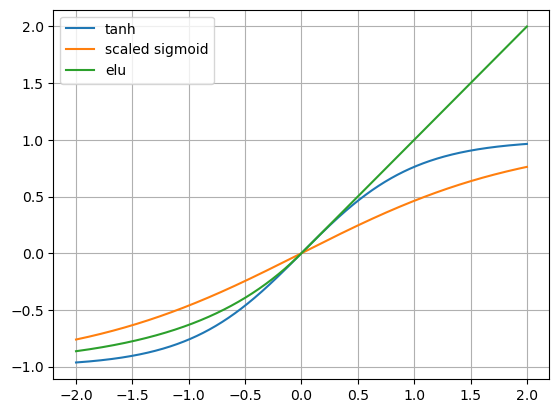

In [14]:
y4 = y2*2-1

plt.plot(x, y1, label='tanh')
plt.plot(x, y4, label='scaled sigmoid')
plt.plot(x, y3, label='elu')
plt.legend()
plt.grid(True)
plt.show()